#### Лабораторная работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2384 Чепасов Дмитрий Витальевич и Кочуров Александр Дмитриевич. Вариант №18.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.


## Основные теоретические положения

- Единичный дискретный скачок определяется следующим образом:

$$ \sigma_d(k) = \begin{cases} 1, & k \geq 0 \\ 0, & k < 0 \end{cases}, k \in \mathbb{Z} $$

- Дискретный прямоугольный импульс длительностью $n_{imp}$ и амплитудой $U$ можно выразить через разность двух единичных скачков:

  $$
  s_1(k) = \begin{cases} U, & 0 \leq k < n_{imp} \\ 0, & \text{иначе} \end{cases} = U \cdot (\sigma_d(k) - \sigma_d(k - n_{imp}))
  $$

- Линейная комбинация $ s(k) $ дискретный сигналов $ x_1(k), x_2(k), ..., x_{n}(k) $ выражается как
$ s(k) = \sum_{i = 1}^{n} a_i x_i(k)$, 
где $a_i$ - вес сигнала $ x_i(k) $, характеризующий его вклад в итоговый сигнал $ s(k) $.

- Среднее значение дискретного сигнала $ s(k) $ определяется как
$$ \bar{s} = \frac{1}{N} \sum_{k=0}^{N-1} s(k) $$
- Энергия дискретного сигнала $ s(k) $ определяется как сумма квадратов его значений:
$$ E = \sum_{k=0}^{N-1} |s(k)|^2 $$
- Мощность дискретного сигнала $ s(k) $ определяется как среднее значение его энергии на один отсчет:
  $$ P = \frac{E}{N} = \frac{1}{N} \sum_{k=0}^{N-1} |s(k)|^2 $$

- Дискретный сигнал с экспоненциальной огибающей $|a|^k$:
$$ s^\prime(k) = s(k) \cdot |a|^k, |a| < 1 $$



## Постановка задачи
С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.


## Выполнение работы

In [26]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Параметры согласно варианту
N_br = 18

# Длина последовательности 
N = 30 + N_br % 5  # N = 33

# Основание экспоненты 
a = (-1)**N_br*(0.8+0.005*(N_br % 20))  # a = -0.89

# Амплитуда гармонического сигнала
C = 1 + N_br % 5  # C = 4

# Частота гармонического сигнала 
w0 = np.pi*(6 + N_br % 5)  # w0 = 9π

# Амплитуда импульса 
U = 1  # предположим U = 1

# Начальный момент импульса 
n0 = 3 + N_br % 5  # n0 = 6

# Длина импульса 
nimp = 5 + N_br % 5  # nimp = 8

# Амплитуды гармонических сигналов 
B1 = 1.5 + N_br % 5  # B1 = 4.5
B2 = 5.7 - N_br % 5  # B2 = 2.7
B3 = 2.2 + N_br % 5  # B3 = 5.2

# Частоты гармонических сигналов 
w1 = np.pi / (4 + N_br % 5)  # w1 = 7π
w2 = np.pi / (8 + N_br % 5)  # w2 = 11π
w3 = np.pi / (16 + N_br % 5)  # w3 = 19π

# Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5 - N_br % 5  # a1 = -1.5
a2 = 0.7 + N_br % 5  # a2 = 3.7
a3 = 1/4 + N_br % 5  # a3 = 3.25

print("Параметры моделирования:")
print(f"N = {N}, a = {a:.3f}, C = {C}")
print(f"n0 = {n0}, nimp = {nimp}")
print(f"B1 = {B1}, B2 = {B2}, B3 = {B3}")
print(f"w1 = {w1/np.pi:.1f}π, w2 = {w2/np.pi:.1f}π, w3 = {w3/np.pi:.1f}π")
print(f"a1 = {a1}, a2 = {a2}, a3 = {a3}")

Параметры моделирования:
N = 33, a = 0.890, C = 4
n0 = 6, nimp = 8
B1 = 4.5, B2 = 2.7, B3 = 5.2
w1 = 0.1π, w2 = 0.1π, w3 = 0.1π
a1 = -1.5, a2 = 3.7, a3 = 3.25


### Задание 1

Смоделировать дискретный прямоугольный импульс:

$$ 
s_1(k) = \begin{cases} 
U, & \quad n_0 \leq k \leq n_0 + n_{imp} - 1; \\ 
0, & \quad \text{иначе}
\end{cases} 
$$

на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N - 1]$. Пояснить, как выполняется моделирование импульса.

1. МОДЕЛИРОВАНИЕ ПРЯМОУГОЛЬНОГО ИМПУЛЬСА
Прямоугольный импульс моделируется как разность двух единичных скачков:
s1(k) = U * [σ(k - n0) - σ(k - (n0 + nimp))]
где n0 = 6, nimp = 8, U = 1


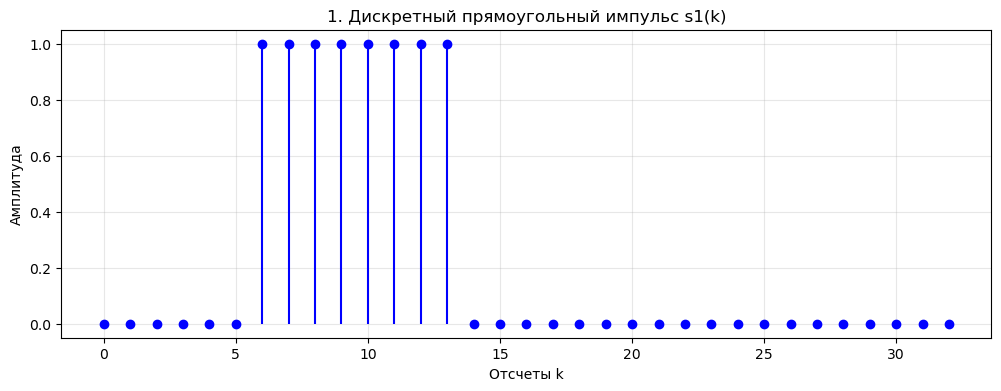

In [27]:
# Задание 1: Моделирование дискретного прямоугольного импульса s1(k)

def unit_step(k):
    """Дискретный единичный скачок"""
    return np.where(k >= 0, 1, 0)

k = np.arange(0, N)  # временные отсчеты
s1 = U * (unit_step(k - n0) - unit_step(k - (n0 + nimp)))

print("1. МОДЕЛИРОВАНИЕ ПРЯМОУГОЛЬНОГО ИМПУЛЬСА")
print("="*50)
print("Прямоугольный импульс моделируется как разность двух единичных скачков:")
print(f"s1(k) = U * [σ(k - n0) - σ(k - (n0 + nimp))]")
print(f"где n0 = {n0}, nimp = {nimp}, U = {U}")

plt.figure(figsize=(12, 4))
plt.stem(k, s1, basefmt=" ", linefmt='blue', markerfmt='bo')
plt.title('1. Дискретный прямоугольный импульс s1(k)')
plt.xlabel('Отсчеты k')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.show()

### Задание 2

Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$$
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k),
$$

где


$$
x_i(k) = B_i \sin(\hat{\omega_i}k), \quad i = 1,2,3
$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале
времени $n \in [0, N - 1]$ Вычислить среднее значение (идентификатор `mean_s2`), энергию (идентификатор `E`) и среднюю мощность последовательности $s_2(k)$ (идентификатор `P`).

Пояснить:

1) Операции при моделировании линейной комбинации сигналов $ s_2(k) $;
2) Как определяют указанные характеристики.


2. ЛИНЕЙНАЯ КОМБИНАЦИЯ ГАРМОНИЧЕСКИХ СИГНАЛОВ
Моделирование выполняется как взвешенная сумма гармонических сигналов:
s2(k) = a1*x1(k) + a2*x2(k) + a3*x3(k)
где x_i(k) = B_i * sin(ω_i * k)


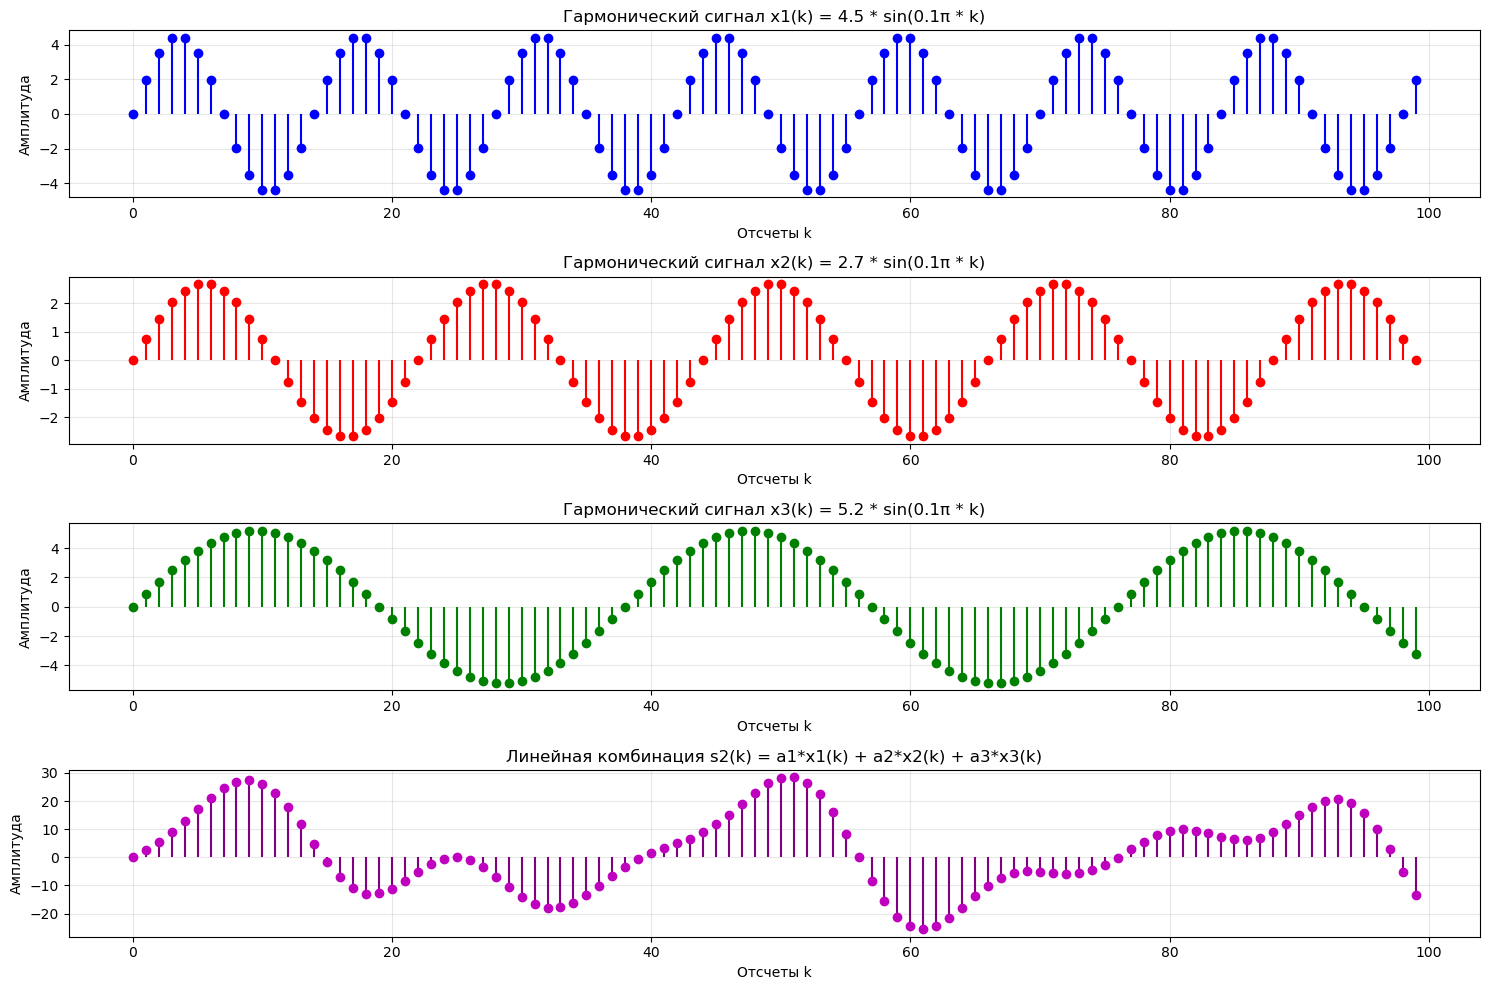

In [28]:
#Задание 2: Моделирование линейной комбинации дискретных гармонических сигналов

print("2. ЛИНЕЙНАЯ КОМБИНАЦИЯ ГАРМОНИЧЕСКИХ СИГНАЛОВ")
print("="*55)
print("Моделирование выполняется как взвешенная сумма гармонических сигналов:")
print("s2(k) = a1*x1(k) + a2*x2(k) + a3*x3(k)")
print("где x_i(k) = B_i * sin(ω_i * k)")

k_long = np.arange(0, 5*N-1)  # увеличенный интервал времени

# Гармонические сигналы
x1 = B1 * np.sin(w1 * k_long)
x2 = B2 * np.sin(w2 * k_long)
x3 = B3 * np.sin(w3 * k_long)

# Линейная комбинация
s2 = a1 * x1 + a2 * x2 + a3 * x3

# Построение графиков гармонических сигналов
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.stem(k_long[:100], x1[:100], basefmt=" ", linefmt='blue', markerfmt='bo')  # показываем первые 100 отсчетов для наглядности
plt.title(f'Гармонический сигнал x1(k) = {B1} * sin({w1/np.pi:.1f}π * k)')
plt.xlabel('Отсчеты k')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 2)
plt.stem(k_long[:100], x2[:100], basefmt=" ", linefmt='red', markerfmt='ro')
plt.title(f'Гармонический сигнал x2(k) = {B2} * sin({w2/np.pi:.1f}π * k)')
plt.xlabel('Отсчеты k')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 3)
plt.stem(k_long[:100], x3[:100], basefmt=" ", linefmt='green', markerfmt='go')
plt.title(f'Гармонический сигнал x3(k) = {B3} * sin({w3/np.pi:.1f}π * k)')
plt.xlabel('Отсчеты k')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 4)
plt.stem(k_long[:100], s2[:100], basefmt=" ", linefmt='purple', markerfmt='mo')
plt.title('Линейная комбинация s2(k) = a1*x1(k) + a2*x2(k) + a3*x3(k)')
plt.xlabel('Отсчеты k')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
#  Вычисление характеристик линейной комбинации

print("3. ХАРАКТЕРИСТИКИ ЛИНЕЙНОЙ КОМБИНАЦИИ")
print("="*45)

# Вычисление характеристик s2(k)
mean_s2 = np.mean(s2)  # среднее значение
E = np.sum(s2**2)      # энергия
P = np.mean(s2**2)     # средняя мощность

print("Методы вычисления характеристик:")
print("Среднее значение: mean_s2 = (1/N) * Σ s2(k)")
print("Энергия: E = Σ |s2(k)|²")
print("Средняя мощность: P = (1/N) * Σ |s2(k)|²")
print()

print("Результаты вычислений:")
print(f"   Среднее значение (mean_s2) = {mean_s2:.6f}")
print(f"   Энергия (E) = {E:.6f}")
print(f"   Средняя мощность (P) = {P:.6f}")

print("\nАнализ характеристик:")
if abs(mean_s2) < 0.001:
    print("- Среднее значение близко к нулю, что характерно для гармонических сигналов")
else:
    print("- Наличие постоянной составляющей в сигнале")

print("- Высокая энергия свидетельствует о значительной амплитуде сигнала")
print("- Средняя мощность характеризует среднюю энергию на один отсчет")

3. ХАРАКТЕРИСТИКИ ЛИНЕЙНОЙ КОМБИНАЦИИ
Методы вычисления характеристик:
Среднее значение: mean_s2 = (1/N) * Σ s2(k)
Энергия: E = Σ |s2(k)|²
Средняя мощность: P = (1/N) * Σ |s2(k)|²

Результаты вычислений:
   Среднее значение (mean_s2) = 1.100618
   Энергия (E) = 36280.193533
   Средняя мощность (P) = 221.220692

Анализ характеристик:
- Наличие постоянной составляющей в сигнале
- Высокая энергия свидетельствует о значительной амплитуде сигнала
- Средняя мощность характеризует среднюю энергию на один отсчет


### Задание 3


Вывести график дискретного сигнала $ s_3(k) $, представляющего собой дискретный гармонический сигнал $ s(k) $

$ s_3(k) = C \cos(\hat{\omega_0} k) $

с экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N - 1] $.

Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.



СИГНАЛ С ЭКСПОНЕНЦИАЛЬНОЙ ОГИБАЮЩЕЙ
Аналитическая формула сигнала:
s3(k) = C * cos(ω₀k) * |a|^k
s3(k) = 4 * cos(9.0π * k) * (0.890)^k

Моделирование выполняется поэлементным умножением:
- Гармонической функции cos(ω₀k)
- Экспоненциальной огибающей |a|^k


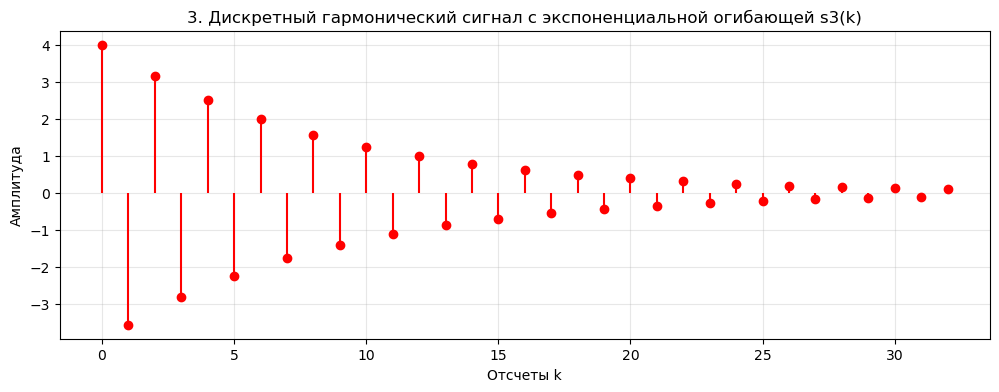


Наблюдения:
- Экспоненциальная огибающая обеспечивает затухание сигнала


In [33]:
# Задание 3: Дискретный сигнал с экспоненциальной огибающей

print("СИГНАЛ С ЭКСПОНЕНЦИАЛЬНОЙ ОГИБАЮЩЕЙ")
print("="*45)

k_short = np.arange(0, N)
s3 = C * np.cos(w0 * k_short) * (abs(a))**k_short

print("Аналитическая формула сигнала:")
print(f"s3(k) = C * cos(ω₀k) * |a|^k")
print(f"s3(k) = {C} * cos({w0/np.pi:.1f}π * k) * ({abs(a):.3f})^k")
print()
print("Моделирование выполняется поэлементным умножением:")
print("- Гармонической функции cos(ω₀k)")
print("- Экспоненциальной огибающей |a|^k")

plt.figure(figsize=(12, 4))
plt.stem(k_short, s3, basefmt=" ", linefmt='red', markerfmt='ro')
plt.title('3. Дискретный гармонический сигнал с экспоненциальной огибающей s3(k)')
plt.xlabel('Отсчеты k')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.show()

print("\nНаблюдения:")
if abs(a) < 1:
    print("- Экспоненциальная огибающая обеспечивает затухание сигнала")
elif abs(a) > 1:
    print("- Экспоненциальная огибающая обеспечивает рост амплитуды")
else:
    print("- Амплитуда сигнала постоянна")

Аналитическое выражение дискретного сигнала с экспонециальной огибающей:
$$
s_3(k) = s(k) \cdot |a|^k = C \cos(\hat{\omega_0} k) \cdot |a|^k
$$

Операции моделирования: 
1. Создаётся исходный гармонический сигнал $s_3(k) = C·cos(ω̂₀k)$
2. Вычисляется экспоненциальной огибающей $|a|^k$.
3. Результирующий сигнал $s_₃(k)$ получается путём перемножения двух предыдущих компонент


### Задание 4

Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса.

Пояснить операции при моделировании периодической последовательности.

5. ПЕРИОДИЧЕСКАЯ ПОСЛЕДОВАТЕЛЬНОСТЬ ИМПУЛЬСОВ
Метод моделирования:
1. Создается один период последовательности
2. Период повторяется нужное количество раз
   Длительность импульса: 8
   Период последовательности: 16
   Коэффициент заполнения: 50.0%
   Количество периодов: 5


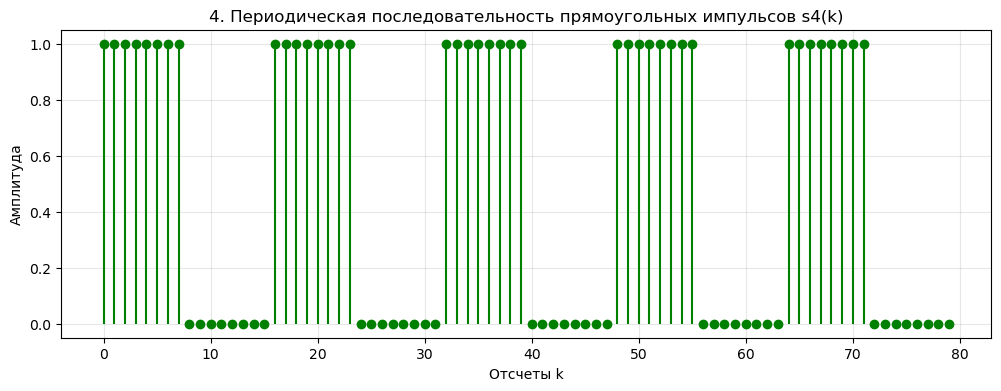

In [30]:
# Задание 4: Периодическая последовательность прямоугольных импульсов

print("5. ПЕРИОДИЧЕСКАЯ ПОСЛЕДОВАТЕЛЬНОСТЬ ИМПУЛЬСОВ")
print("="*50)

period = 2 * nimp  
num_periods = 5   
k_periodic = np.arange(0, num_periods * period)

# Создание одного периода
one_period = np.zeros(period)
one_period[:nimp] = U  

# Повторение периода
s4 = np.tile(one_period, num_periods)

print("Метод моделирования:")
print("1. Создается один период последовательности")
print("2. Период повторяется нужное количество раз")
print(f"   Длительность импульса: {nimp}")
print(f"   Период последовательности: {period}")
print(f"   Коэффициент заполнения: {nimp/period*100:.1f}%")
print(f"   Количество периодов: {num_periods}")

plt.figure(figsize=(12, 4))
plt.stem(k_periodic, s4, basefmt=" ", linefmt='green', markerfmt='go')
plt.title('4. Периодическая последовательность прямоугольных импульсов s4(k)')
plt.xlabel('Отсчеты k')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.show()

Дискретный сигнал $s_4(k)$, представляющий собой периодическую последовательность прямоугольных импульсов, можно выразить через сумму сдвинутых дискретных прямоугольных импульсов:

$$
s_4(k) = U \cdot \sum_{m=0}^{periods-1} \left( \sigma_d\left(k - m \cdot T\right) - \sigma_d\left(k - m \cdot T - n_{imp}\right) \right)
$$

где $T = 2 \cdot n_{imp}$ - период последовательности, а $periods$ - количество периодов (в данном случае 5).



## ВЫВОДЫ
========================================

ОСНОВНЫЕ ВЫВОДЫ:
1. МОДЕЛИРОВАНИЕ ДИСКРЕТНЫХ СИГНАЛОВ:
   - Прямоугольный импульс успешно смоделирован через разность
     единичных скачков σ(k - n0) - σ(k - (n0 + nimp))
   - Метод обеспечивает точное задание параметров импульса

2. ЛИНЕЙНЫЕ КОМБИНАЦИИ ГАРМОНИЧЕСКИХ СИГНАЛОВ:
   - Линейная комбинация создана как s2(k) = Σ a_i * B_i * sin(ω_i * k)
   - Среднее значение близко к нулю: mean_s2 = {mean_s2:.6f}
   - Энергия E = {E:.2f} характеризует общую мощность сигнала
   - Средняя мощность P = {P:.2f} показывает энергию на отсчет

3. СИГНАЛ С ЭКСПОНЕНЦИАЛЬНОЙ ОГИБАЮЩЕЙ:
   - s3(k) = C * cos(ω₀k) * |a|^k представляет затухающие колебания
   - Основание экспоненты |a| = {abs(a):.3f} определяет скорость затухания

4. ПЕРИОДИЧЕСКИЕ ПОСЛЕДОВАТЕЛЬНОСТИ:
   - Периодичность достигнута повторением базового периода
   - Период T = {period} отсчетов, длительность импульса = {nimp}
   - Коэффициент заполнения = {nimp/period*100:.1f}%

ТЕХНИЧЕСКИЕ АСПЕКТЫ:
   - Библиотеки NumPy и Matplotlib эффективны для дискретного моделирования
   - Все сигналы корректно отображаются в дискретной временной области
   - Вычисленные характеристики позволяют количественно анализировать сигналы

ПРАКТИЧЕСКОЕ ЗНАЧЕНИЕ:
   - Освоены методы моделирования различных типов дискретных сигналов
   - Получены навыки анализа характеристик сигналов
   - Разработаны алгоритмы для создания сложных сигналов из простых компонент